In [1]:
open('tarantino.csv')

<_io.TextIOWrapper name='tarantino.csv' mode='r' encoding='UTF-8'>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [6]:
curse = pd.read_csv('tarantino.csv', encoding="UTF-8")
curse.sample(5)

,movie,type,word,minutes_in
561,Pulp Fiction,word,fucking,41.05
329,Reservoir Dogs,word,fucking,72.61
840,Pulp Fiction,word,fucking,135.47
782,Pulp Fiction,word,fuck,120.30
331,Reservoir Dogs,word,bitch,73.05


In [10]:
curse.sample(20)

,movie,type,word,minutes_in
483,Pulp Fiction,word,motherfucker,12.95
1737,Jackie Brown,word,ass,76.92
126,Reservoir Dogs,word,fucking,28.83
1487,Django Unchained,word,motherfucker,152.35
1185,Inglorious Basterds,word,fuck,121.63
336,Reservoir Dogs,word,bitch,74.40
201,Reservoir Dogs,word,asshead,42.86
633,Pulp Fiction,word,n-word,70.55
1827,Jackie Brown,word,ass,124.68
787,Pulp Fiction,word,motherfucking,121.03


In [6]:
type(curse.minutes_in)

pandas.core.series.Series

In [8]:
curse.dtypes

movie          object
type           object
word           object
minutes_in    float64
dtype: object

In [7]:
curse.movie.unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

In [8]:
open('credits.csv')

<_io.TextIOWrapper name='credits.csv' mode='r' encoding='UTF-8'>

In [9]:
credits=pd.read_csv('credits.csv', encoding="UTF-8")
credits.sample(5)

,movie_id,title,cast,crew
2900,61984,Space Battleship Yamato,"[{""cast_id"": 1000, ""character"": ""Hajime Saito""...","[{""credit_id"": ""52fe466cc3a368484e08ffdf"", ""de..."
1327,312221,Creed,"[{""cast_id"": 1, ""character"": ""Adonis Johnson"",...","[{""credit_id"": ""5660debac3a36875ed004b80"", ""de..."
4203,206284,Grace Unplugged,"[{""cast_id"": 12, ""character"": ""Gracie Trey"", ""...","[{""credit_id"": ""52fe4d19c3a368484e1d724d"", ""de..."
33,36668,X-Men: The Last Stand,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."
3920,15158,Phantasm II,"[{""cast_id"": 4, ""character"": ""Mike"", ""credit_i...","[{""credit_id"": ""535f7e3f0e0a264fde007a18"", ""de..."


In [10]:
credits.cast.sample(5)

1229    [{"cast_id": 5, "character": "Albert Stark", "...
496     [{"cast_id": 15, "character": "Flint Lockwood ...
736     [{"cast_id": 21, "character": "Casey Ryback", ...
1049    [{"cast_id": 11, "character": "Jack Ryan", "cr...
4618    [{"cast_id": 1054, "character": "Duff Anderson...
Name: cast, dtype: object

In [11]:
open('movies.csv')

<_io.TextIOWrapper name='movies.csv' mode='r' encoding='UTF-8'>

In [12]:
movies=pd.read_csv('movies.csv', encoding="UTF-8")
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1931,32000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.theroad-movie.com/,20766,"[{""id"": 4458, ""name"": ""post-apocalyptic""}, {""i...",en,The Road,A father and his son walk alone through burned...,41.075532,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-11-25,27635305,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,In a moment the world changed forever.,The Road,6.8,1087
4572,225000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,15389,"[{""id"": 213, ""name"": ""upper class""}, {""id"": 24...",en,Metropolitan,A sparkling comedic chronicle of a middle-clas...,1.014966,"[{""name"": ""Allagash Films"", ""id"": 3076}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1990-08-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Finally... A film about the downwardly mobile.,Metropolitan,7.0,38
1005,48000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",NaN,1900,"[{""id"": 279, ""name"": ""usa""}, {""id"": 1601, ""nam...",en,Traffic,An exploration of the United States of America...,25.170217,"[{""name"": ""USA Films"", ""id"": 987}, {""name"": ""I...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-12-27,207515725,147.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,No one gets away clean,Traffic,6.9,562
4203,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",http://www.graceunplugged.com/,206284,"[{""id"": 5950, ""name"": ""christian""}]",en,Grace Unplugged,A talented young singer and aspiring songwrite...,2.160586,"[{""name"": ""Coram Deo Studios"", ""id"": 30270}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-04,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Would you give up what you need... to get ever...,Grace Unplugged,6.0,24
1800,26000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,70436,"[{""id"": 351, ""name"": ""poison""}, {""id"": 1936, ""...",en,The Raven,A fictionalized account of the last days of Ed...,22.520842,"[{""name"": ""Relativity Media"", ""id"": 7295}]","[{""iso_3166_1"": ""HU"", ""name"": ""Hungary""}, {""is...",2012-03-09,29657751,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The only one who can stop a serial killer is t...,The Raven,6.1,426


In [13]:
open('pfscript.csv')

<_io.TextIOWrapper name='pfscript.csv' mode='r' encoding='UTF-8'>

In [44]:
script=pd.read_csv('pfscript.csv', encoding="UTF-8")
script.sample(5)

,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count
181,182,Brett,Brett,False,False,int. apartment (room 49),morning,Sprite.,1
249,250,Marsellus,Marsellus,True,False,int. Sally LeRoy's,day,"Vincent Vega has entered the building, git you...",11
1181,1182,Vincent,Vincent,False,False,int. coffee shop,morning,I think we oughta leave now.,6
1040,1041,Winston,The Wolf,False,False,ext. Monster Joe's Truck and Tow,morning,"You hear that, young lady? Respect. You could ...",22
27,28,Young woman,Honey Bunny,False,False,int. coffee shop,morning,"Well, what else is there, day jobs?",7


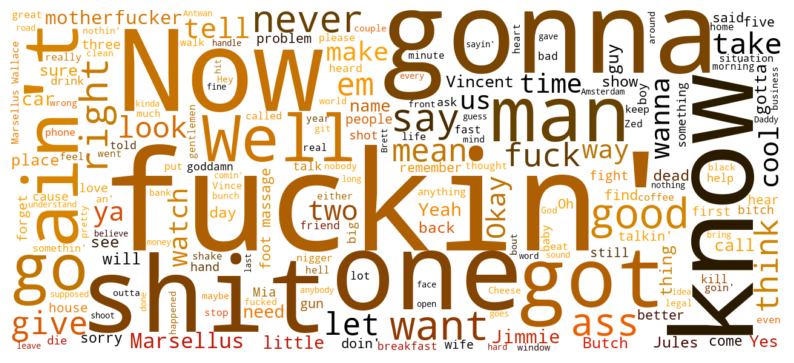

In [53]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Combinar todos los diálogos en un solo string
text = ' '.join(script['Line'])

# Cargar la imagen de Pulp Fiction
pulp_fiction_mask = np.array(Image.open("logo.png"))

# Crear el objeto WordCloud
wordcloud = WordCloud(background_color="white", mask=pulp_fiction_mask, stopwords=STOPWORDS)

# Generar la nube de palabras
wordcloud.generate(text)

# Obtener los colores de la imagen de Pulp Fiction
image_colors = ImageColorGenerator(pulp_fiction_mask)

# Mostrar la imagen
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('pulp_fiction_wordcloud.png', bbox_inches='tight')
plt.show()


In [15]:
open('tmdb.csv')

<_io.TextIOWrapper name='tmdb.csv' mode='r' encoding='UTF-8'>

In [16]:
tmdb=pd.read_csv('tmdb.csv', encoding="UTF-8")
tmdb.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2642,676,tt0213149,2.478879,140000000,449220945,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,NaN,Michael Bay,"December 7, 1941 - A day that shall live in in...",...,The lifelong friendship between Rafe McCawley ...,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,5/21/2001,1044,6.6,2001,1.724083e+08,553210255.5
10113,10911,tt0054953,0.754548,6000000,28900000,The Guns of Navarone,Gregory Peck|David Niven|Anthony Quinn|Stanley...,NaN,J. Lee Thompson|Alexander Mackendrick,The Greatest High Adventure Ever Filmed!,...,A team of allied saboteurs are assigned an imp...,158,Action|Adventure|Drama|War,Columbia Pictures,4/27/1961,95,7.0,1961,4.376917e+07,210821488.9
7815,21943,tt0877522,0.032904,0,0,Ho Voglia Di Te,Riccardo Scamarcio|Laura Chiatti|Katy Louise S...,http://www.hovogliadite.it/,Luis Prieto,NaN,...,The film stars Riccardo Scamarcio as a macho t...,106,Romance|Comedy,NaN,3/9/2007,38,4.2,2007,0.000000e+00,0.0
4333,20678,tt0109288,0.149668,0,0,Blankman,Damon Wayans|David Alan Grier|Robin Givens|Chr...,NaN,Mike Binder,NaN,...,Darryl is a childlike man with a genius for in...,96,Action|Adventure|Comedy,Columbia Pictures,8/19/1994,16,4.9,1994,0.000000e+00,0.0
3125,17314,tt1014801,0.357127,10000000,0,Pistol Whipped,Steven Seagal|Lance Henriksen|Blanchard Ryan|B...,NaN,Roel ReinÃ©,They came to collect a debt... He paid in full.,...,"Steven Seagal stars in this gritty, no-holds b...",96,Action|Thriller|Crime|Drama,NaN,1/1/2008,12,5.7,2008,1.012787e+07,0.0


In [43]:
script.sample()

,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count,Words,sentiment
251,252,Jody,Jody,False,False,int. Lance's house (kitchen),night,...I'll lend it to you. It's a great book on b...,12,"[..., 'll, lend, great, book, body, piercing]",0.6249


In [18]:
script.head(15)

,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count
0,1,Young man,Pumpkin,False,False,int. coffee shop,morning,"No, forget it, it's too risky. I'm through doi...",11
1,2,Young woman,Honey Bunny,False,False,int. coffee shop,morning,"You always say that, the same thing every time...",15
2,3,Young man,Pumpkin,False,False,int. coffee shop,morning,I know that's what I always say. I'm always ri...,12
3,4,Young woman,Honey Bunny,False,False,int. coffee shop,morning,– but you forget about it in a day or two -,10
4,5,Young man,Pumpkin,False,False,int. coffee shop,morning,"– yeah, well, the days of me forgittin' are ov...",18
5,6,Young woman,Honey Bunny,False,False,int. coffee shop,morning,"When you go on like this, you know what you so...",12
6,7,Young man,Pumpkin,False,False,int. coffee shop,morning,"I sound like a sensible fucking man, is what I...",12
7,8,Young woman,Honey Bunny,False,False,int. coffee shop,morning,"You sound like a duck. Quack, quack, quack, qu...",12
8,9,Young man,Pumpkin,False,False,int. coffee shop,morning,"Well take heart, 'cause you're never gonna haf...",34
9,10,Young woman,Honey Bunny,False,False,int. coffee shop,morning,After tonight.,2


In [19]:
script['Character (actual)'] = script['Character (actual)'].replace('The Wolf','Wolf')


In [20]:
characters=set(script["Character (actual)"])
len(characters)

37

In [21]:
print(characters)

{'Lance', 'Roger', 'Zed', 'Ed Sullivan', 'Esmarelda', 'Marsellus', 'Pedestrian', 'The Gimp', 'Klondike', 'Looky-loo woman', 'Raquel', 'Honey Bunny', 'Mother', 'Pumpkin', 'Jules', 'Preacher (Emil Simkus)', 'Maynard', 'Brett', 'Mia', 'Wolf', 'Buddy', 'Manager', 'English Dave', 'Jimmie', 'Marvin', 'Fabienne', 'Vincent', 'Capt. Koons', 'Trudi', 'Jody', 'Fourth man', 'Gawker #2', 'Sportscaster #1', 'Butch', 'Waitress', 'Sportscaster #2', 'Gawker #1'}


In [22]:
women=("Waitress", "Trudi", "Looky-loo woman", "Esmarelda", "Mother", "Raquel", "Honey Bunny", "Mia", "Jody", "Fabienne")

In [23]:

women_script = script[script['Character (actual)'].isin(women)]
women_indices = []
for i in range(len(women_script)-1):
    if women_script.iloc[i]['Character (actual)'] != women_script.iloc[i+1]['Character (actual)'] and \
    women_script.iloc[i+1]['Character (actual)'] in women and \
    women_script.iloc[i+1]['Line number'] - women_script.iloc[i]['Line number'] == 1:
        women_indices.append(i)
        women_indices.append(i+1)
women_indices.append(len(women_script)-1)

result = women_script.iloc[women_indices][['Character (actual)', 'Line', 'Place']]


In [24]:
result

,Character (actual),Line,Place
11,Waitress,Can I get anybody anymore coffee?,int. coffee shop
12,Honey Bunny,"Oh yes, thank you.",int. coffee shop
32,Waitress,"""Garcon"" means boy.",int. coffee shop
33,Honey Bunny,Here? It's a coffee shop.,int. coffee shop
251,Jody,...I'll lend it to you. It's a great book on b...,int. Lance's house (kitchen)
252,Trudi,You know how they use that gun when they pierc...,int. Lance's house (kitchen)
252,Trudi,You know how they use that gun when they pierc...,int. Lance's house (kitchen)
253,Jody,Forget that gun. That gun goes against the ent...,int. Lance's house (kitchen)
524,Mia,Something.,living room
525,Jody,Anybody want a beer?,living room


In [25]:
print(script.Line[251])
print(script.Line[252])
print(script.Line[253])

...I'll lend it to you. It's a great book on body piercing.
You know how they use that gun when they pierce your ears? They don't use that when they pierce your nipples, do they?
Forget that gun. That gun goes against the entire idea behind piercing. All of my piercing, sixteen places on my body, every one of 'em done with a needle. Five in each ear. One through the nipple on my left breast. One through my right nostril. One through my left eyebrow. One through my lip. One in my clit. And I wear a stud in my tongue.


In [26]:
pattern = r"\b(foot|feet|shoe|sock|toe)s?\b"
regex = re.compile(pattern, flags=re.IGNORECASE)
counts = script["Line"].str.count(regex).sum()

print(f"Total occurrences: {counts}")

Total occurrences: 24


In [27]:
pattern2 = r"\b(Red Apple)s?\b"
regex2 = re.compile(pattern2, flags=re.IGNORECASE)
counts2 = script["Line"].str.count(regex2).sum()

print(f"Total occurrences: {counts2}")

Total occurrences: 2


In [28]:
pattern3 = r"\b(Kahuna)s?\b"

regex3 = re.compile(pattern3, flags=re.IGNORECASE)
counts3 = script["Line"].str.count(regex3).sum()

print(f"Total occurrences: {counts3}")

Total occurrences: 3


In [29]:
mask = script["Line"].str.contains(regex)
matched_rows = script[mask]
matched_rows

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10160\3561032519.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = script["Line"].str.contains(regex)


,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count
108,109,Jules,Jules,False,False,int. elevator,morning,He gave her a foot massage.,6
109,110,Vincent,Vincent,False,False,int. elevator,morning,A foot massage?,3
116,117,Vincent,Vincent,False,False,int. apartment building hallway,morning,You don't be givin' Marsellus Wallace's new br...,11
119,120,Jules,Jules,False,False,int. apartment building hallway,morning,"It was a foot massage, a foot massage is nothi...",17
121,122,Jules,Jules,False,False,int. apartment building hallway,morning,Whoa... whoa... whoa... stop right there. Eati...,23
123,124,Jules,Jules,False,False,int. apartment building hallway,morning,It ain't no ballpark either. Look maybe your m...,47
124,125,Vincent,Vincent,False,False,int. apartment building hallway,morning,Have you ever given a foot massage?,7
125,126,Jules,Jules,False,False,int. apartment building hallway,morning,Don't be tellin' me about foot massages – I'm ...,12
128,129,Vincent,Vincent,False,False,int. apartment building hallway,morning,Have you ever given a guy a foot massage?,9
132,133,Vincent,Vincent,False,False,int. apartment building hallway,morning,Would you give me a foot massage – I'm kinda t...,10


In [30]:
mask2 = script["Line"].str.contains(regex2)
matched_rows2 = script[mask2]
matched_rows2

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10160\4026107325.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask2 = script["Line"].str.contains(regex2)


,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count
242,243,Butch,Butch,False,False,int. Sally LeRoy's,day,Can I get a pack'a Red Apples?,7
250,251,English Dave,English Dave,True,False,int. Sally LeRoy's,day,"Pack of Red Apples, dollar-forty.",5


In [32]:
mask3 = script["Line"].str.contains(regex3)
matched_rows3 = script[mask3]
matched_rows3

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10160\346753647.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask3 = script["Line"].str.contains(regex3)


,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count
163,164,Brett,Brett,False,False,int. apartment (room 49),morning,Big Kahuna Burger.,3
164,165,Jules,Jules,False,False,int. apartment (room 49),morning,Big Kahuna Burger. That's that Hawaiian burger...,24
170,171,Jules,Jules,False,False,int. apartment (room 49),morning,"Uuummmm, that's a tasty burger. Vince, you eve...",13


In [34]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def extract_words(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 2]
    return words

script['Words'] = script['Line'].apply(extract_words)
all_words = [word for words in script['Words'] for word in words]
word_counts = Counter(all_words)
most_common = word_counts.most_common(50)
most_common

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[("n't", 266),
 ("'re", 123),
 ('fuckin', 91),
 ('got', 85),
 ('gon', 77),
 ('like', 75),
 ('know', 72),
 ('...', 69),
 ('get', 68),
 ('one', 67),
 ('shit', 65),
 ("'ll", 62),
 ('man', 61),
 ('well', 48),
 ('good', 42),
 ('want', 39),
 ('right', 35),
 ('marsellus', 35),
 ('never', 34),
 ('say', 33),
 ('take', 33),
 ('tell', 33),
 ("'em", 33),
 ('fuck', 33),
 ('think', 33),
 ('ass', 33),
 ('give', 32),
 ('let', 32),
 ('would', 29),
 ('two', 27),
 ('mean', 26),
 ('little', 26),
 ('wan', 26),
 ('time', 25),
 ("'ve", 25),
 ('cool', 25),
 ('okay', 25),
 ('watch', 25),
 ('way', 24),
 ('car', 24),
 ('jimmie', 24),
 ('thing', 23),
 ('yeah', 23),
 ('need', 22),
 ('dead', 22),
 ('back', 22),
 ('big', 21),
 ('ever', 21),
 ('vincent', 21),
 ('yes', 20)]

In [35]:
grouped = script.groupby("Character (actual)").agg(
    Count=("Word count", "count"),
    Sum=("Word count", "sum"),
    Sentiment=("sentiment", "mean")
)

sorted_df = grouped.sort_values("Count", ascending=False)

sorted_df.index.name = "Character"
importance = sorted_df.reset_index()
print(importance)

KeyError: "Column(s) ['sentiment'] do not exist"

In [38]:
mentions = []
for character in importance['Character']:
    pattern = re.escape(character)
    mentions.append(script['Line'].str.contains(pattern, case=False).sum())

importance['Mentions'] = mentions

print(importance)

NameError: name 'importance' is not defined

In [37]:
imp = importance[importance['Count'] >= 20][['Character', 'Count', 'Sum', 'Mentions', "Sentiment"]]
imp

NameError: name 'importance' is not defined

In [162]:
imp["Quality"]=imp["Sum"]/imp["Count"]
imp["Mentions Ratio"]=imp["Mentions"]/imp["Count"]
imp

,Character,Count,Sum,Mentions,Sentiment,Quality,Mentions Ratio
0,Vincent,259,2586,22,0.027086,9.984556,0.084942
1,Jules,209,3221,18,-0.019805,15.411483,0.086124
2,Butch,135,1254,18,0.070944,9.288889,0.133333
3,Fabienne,90,705,5,0.060812,7.833333,0.055556
4,Mia,81,1009,12,0.016401,12.456790,0.148148
5,Pumpkin,62,881,2,0.040687,14.209677,0.032258
6,Wolf,54,1117,8,0.161430,20.685185,0.148148
7,Lance,50,693,3,0.018406,13.860000,0.060000
8,Honey Bunny,39,267,3,0.006649,6.846154,0.076923
9,Brett,27,89,6,0.117244,3.296296,0.222222


In [39]:
imp.to_csv("character.csv", index=False)

NameError: name 'imp' is not defined

In [40]:
script["sentiment"] = script.Line.apply(lambda x: sia.polarity_scores(x)["compound"])

In [41]:
script.sample()

,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count,Words,sentiment
1024,1025,The Wolf,Wolf,False,False,int. Jimmie's garage,morning,"Spoken like a true prodigy. How 'bout you, Las...",19,"[spoken, like, true, prodigy, 'bout, lash, lar...",0.6868


In [42]:
time=script.groupby("Time").agg(sentiment=("sentiment", "mean"))
time

,sentiment
Time,
day,-0.026534
morning,0.028143
night,0.014163


In [166]:
time.to_csv("time.csv")

In [154]:
place=script.groupby("Place").agg(sentiment=("sentiment", "mean")).sort_values(by="sentiment")
place

,sentiment
Place,
int. garage,-0.652200
int. Butch's apartment,-0.557400
ext. Sally LeRoy's,-0.542300
int. Jackrabbit Slim's (ladies room),-0.525500
ext. Lance's house,-0.358600
int. reception area (apartment building),-0.333180
int. Jimmie's kitchen,-0.332606
ext. alley (raining),-0.272950
int. taxi (parked / raining),-0.209033


In [167]:
place.to_csv("Place.csv")

In [156]:
script["Gender"] = np.where(script["Character (actual)"].isin(women), "W", "M")
script.sample()

,Line number,Character (in script),Character (actual),Off screen,Voice-over,Place,Time,Line,Word count,sentiment,Words,Gender
970,971,Jimmie,Jimmie,False,False,int. kitchen,morning,Yeah. Exactly. Under the sink.,5,0.296,"[yeah, exactly, sink]",M


In [157]:
gender=script.groupby("Gender").agg(sentiment=("sentiment", "mean"))
gender

,sentiment
Gender,
M,0.019689
W,0.011587


In [169]:
gender.to_csv("gender.csv")